<a href="https://colab.research.google.com/github/jtwang1027/cancer_omics/blob/master/1b_SNP_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We're going to examine copy number variation in breast cancer cell lines.

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
#mapp= pd.read_csv('/content/drive/My Drive/snp_mapping.csv')
cnv= pd.read_csv('/content/drive/My Drive/cnv_marcotte.csv')

In [0]:
#marc= pd.read_csv('/content/drive/My Drive/snp_marcotte.csv',skiprows=list(range(0,62))[3:])

This dataframe contains CNV data, with cell lines labels in the index and genes in the columns.

In [14]:
cnv.head()

Unnamed: 0    A1BG  A1BG-AS1    A1CF  ...  ZNF747  ZNF763  ZNF788    ZNF8
0      184A1  0.0178    0.0178  0.0328  ...  0.0131  0.0091  0.0091  0.0178
1      184B5 -0.0197   -0.0197 -0.0027  ... -0.0199 -0.0286 -0.0286 -0.0197
2     MPE600  0.0269    0.0269  0.0359  ...  0.0175  0.0205  0.0205  0.0269
3      AU565 -0.0293   -0.0293 -0.1147  ...  0.0459 -0.3056 -0.3056 -0.0293
4       BT20  0.0985    0.0985 -0.1870  ... -0.1281 -0.1012 -0.1012  0.0985

[5 rows x 29125 columns]

In [0]:
cnv.set_index('Unnamed: 0', inplace=True)

In [25]:
cnv.max(axis=0)

A1BG        0.4231
A1BG-AS1    0.4231
A1CF        0.3984
A2M         0.4058
A2M-AS1     0.4058
             ...  
ZNF709      0.4430
ZNF747      0.3274
ZNF763      0.4430
ZNF788      0.4430
ZNF8        0.4231
Length: 29124, dtype: float64

Text(0.5, 1.0, 'CNV distribution for 184A1')

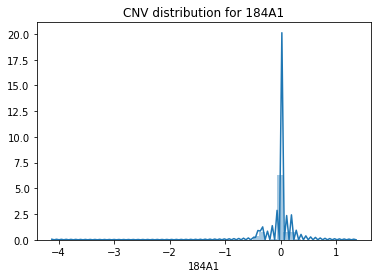

In [31]:
sns.distplot(cnv.loc['184A1',:])
plt.title('CNV distribution for 184A1')

Examine loci for abnormal copy number

In [0]:
deletion=(cnv.loc['184A1',:]<-2) #deletions

In [39]:
cnv.loc['184A1',deletion]

ADAM3A      -2.99610
DNAJC24     -2.16780
GSTT1       -2.38810
GSTTP2      -2.38810
LINC00578   -2.11150
MAGT1       -2.08790
OR13D3P     -2.20925
OR2BH1P     -3.55640
OR52N5      -4.11610
OR56B2P     -4.11610
REV1        -2.22625
Name: 184A1, dtype: float64

## Do these deletions match expectations?

We see several genes in this list that have known associations with breast tumors.
- Olfactory receptors (*OR xx*) have been associated with invasive breast carcinoma. (Masjedi, 2019)
- *GSTP* family has been found to be inactivated in 4% of breast tumors (Lasabova, 2010)
- *REV1* is a DNA repair enzyme and inhibits the oncogene *p53*. Reduced expression of REV1 may allow upregulation of *p53* and uncontrolled cell proliferation. (Shim, 2015)
- *MAGT1* expression has been associated with an aggressive tumor phenotype (Zheng, 2019)
- *ADAM3A* deletion has been associated with high-grade glioma (Barrow, 2010)